<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Problem 2 - Sentiment Analysis Model  (Group)</h2><h3>AY2025 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
# Import the Required Packages
# === Data Handling ===
import pandas as pd
import numpy as np

# === Data Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Model Evaluation ===
from sklearn.metrics import confusion_matrix

# === Text Preprocessing ===
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
# === Label Encoding ===
from tensorflow.keras.utils import to_categorical

# === Deep Learning (Model Training) ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras

# === Google Colab Specific (Optional) ===
#from google.colab import drive
import os

# === Optional for text cleaning ===
import re


In [2]:
#from google.colab import drive
import os
#drive.mount('/content/drive')
#BASE_DIR      = '/content/drive/MyDrive/Assignment'

## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [3]:
#load the dataset
df_ebay = pd.read_csv(f'balanced_ebaymobile.csv')
df_spotify = pd.read_csv(f'spotify_balanced.csv')
df_genshin = pd.read_csv(f'genshin_reviews_regen.csv')
df_paypal = pd.read_csv(f'balanced_teams_reviews_ansel(paypal).csv')
df_telegram = pd.read_csv(f'telegram.csv')

### 1.2 Data Processing


(0.0, 160.0)

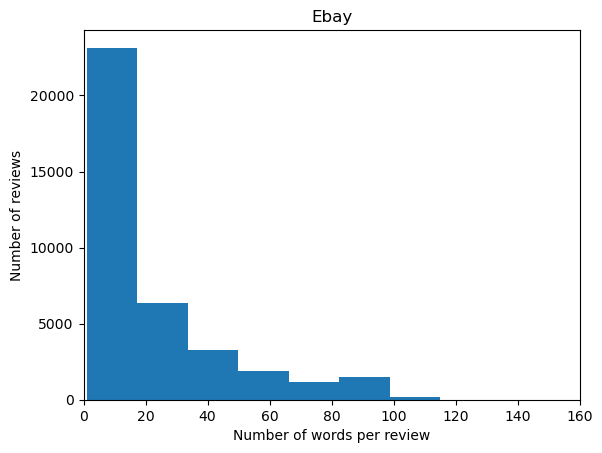

In [4]:
plt.hist(df_ebay['content'].astype(str).apply(lambda x: len(x.split())), bins=40)
plt.title('Ebay')
plt.xlabel('Number of words per review')
plt.ylabel('Number of reviews')
plt.xlim(0, 160)

In [5]:
def prepare_text_data(dataframe, tokenizer):
    # Subset and prepare texts
    df_sub = dataframe[['score', 'content']]
    texts = df_sub['content'].astype(str).tolist()

    # Clean the data (exactly as manual)
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    texts = [clean_text(t) for t in texts]

    # Tokenizer and sequences
    max_words = 10000
    maxlen = 40
    # Tokenize the data using the tokenizers created when training each of our models
    sequences = tokenizer.texts_to_sequences(texts)

    word_index = tokenizer.word_index
    print(f'Found {len(word_index)} unique tokens.')

    data = pad_sequences(sequences, maxlen=maxlen)

    # Prepare labels
    labels = df_sub['score'].astype(int).values
    labels = labels - 1  # shift to 0-4
    labels = to_categorical(labels, num_classes=5)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test

In [6]:
# Evaluate and display results
def evaluate_model(model):
    # Evaluate test accuracy and loss
    loss, acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

    # Predict probabilities and convert to class labels
    y_pred = model.predict(X_test)  # Get class probabilities
    y_pred_classes = np.argmax(y_pred, axis=1) # converts from one-hot vectors to class labels
    y_true_classes = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Plot Confusion Matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[1, 2, 3, 4, 5],
                yticklabels=[1, 2, 3, 4, 5])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [7]:
# === Load models ===
model1 = keras.models.load_model('text_model_best_weijun.keras')
model2 = keras.models.load_model('text_model_best_hongyi.keras')
model3 = keras.models.load_model('best_model_regen (2).keras')
model4 = keras.models.load_model('text_model_ansel.keras')
model5 = keras.models.load_model('text_model_best_Germaine 1.keras')

dataframes = {
    'paypal': df_paypal,
    'ebay': df_ebay,
    'spotify': df_spotify,
    'genshin': df_genshin,
    'telegram': df_telegram
}

# === Load tokenizers ===
with open('tokenizer_weijun (1).pickle', 'rb') as f: tokenizer1 = pickle.load(f)
with open('tokenizer_hongyi.pickle', 'rb') as f: tokenizer2 = pickle.load(f)
with open('tokenizer_regen.pickle', 'rb') as f: tokenizer3 = pickle.load(f)
with open('tokenizer_ansel.pickle', 'rb') as f: tokenizer4 = pickle.load(f)
with open('tokenizer_germaine.pickle', 'rb') as f: tokenizer5 = pickle.load(f)
tokenizers = {
    'weijun': tokenizer1,
    'hongyi': tokenizer2,
    'regen': tokenizer3,
    'ansel': tokenizer4,
    'germaine': tokenizer5
}

### 1.3 Data Sampling

We introduced an additional balancing step performed individually in each group member’s notebook. For each dataset, we examined the distribution of review scores (1 to 5 stars) and then applied down sampling by selecting an equal number of reviews from each score class based on the class with the fewest entries. This ensured that each class contributed equally to the training process, helping the model learn to differentiate all sentiment levels fairly.

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [8]:
models = {
    'weijun': keras.models.load_model('text_model_best_weijun.keras'),
    'hongyi': keras.models.load_model('text_model_best_hongyi.keras'),
    'regen': keras.models.load_model('best_model_regen (2).keras'),
    'ansel': keras.models.load_model('text_model_ansel.keras'),
    'germaine': keras.models.load_model('text_model_best_Germaine 1.keras')
}


Model: WEIJUN
Found 19774 unique tokens.

Evaluating on Paypal dataset:
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4576 - loss: 1.2594
Test Accuracy: 0.4544, Test Loss: 1.2626
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


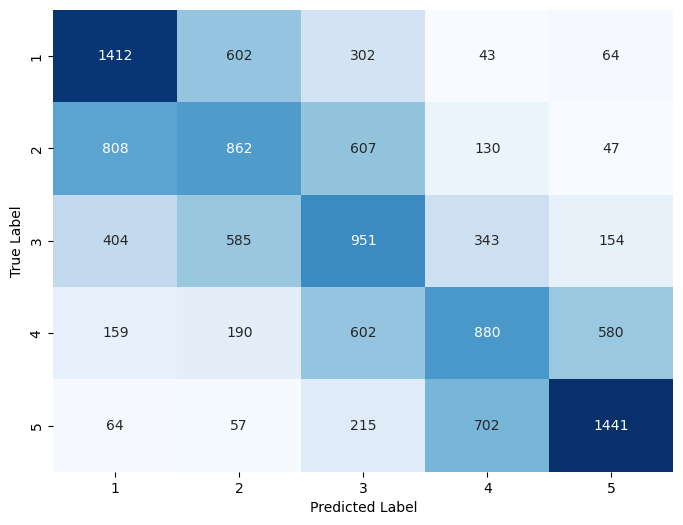

Found 19774 unique tokens.

Evaluating on Ebay dataset:
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4939 - loss: 1.1508
Test Accuracy: 0.4897, Test Loss: 1.1622
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


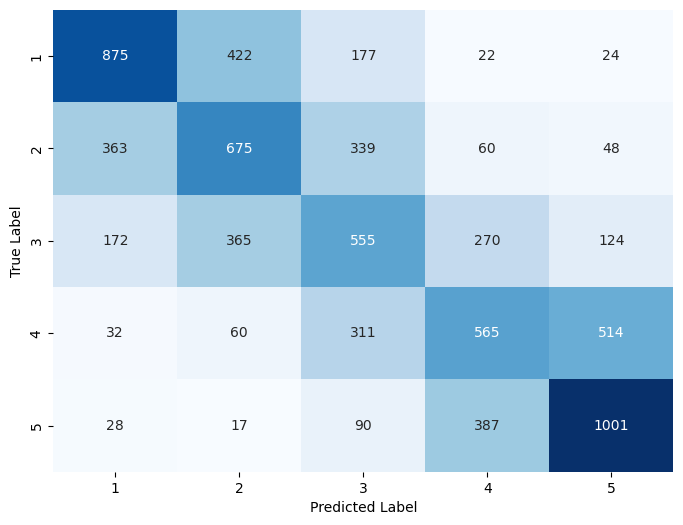

Found 19774 unique tokens.

Evaluating on Spotify dataset:
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4329 - loss: 1.3146
Test Accuracy: 0.4238, Test Loss: 1.3129
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


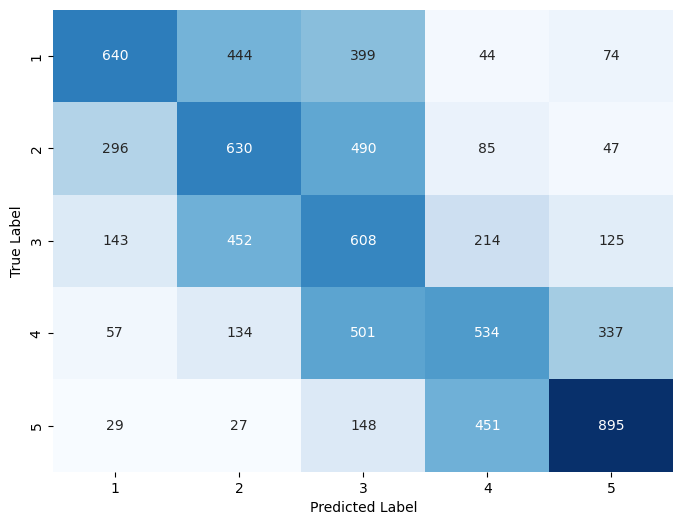

Found 19774 unique tokens.

Evaluating on Genshin dataset:
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3777 - loss: 1.4524
Test Accuracy: 0.3701, Test Loss: 1.4660
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


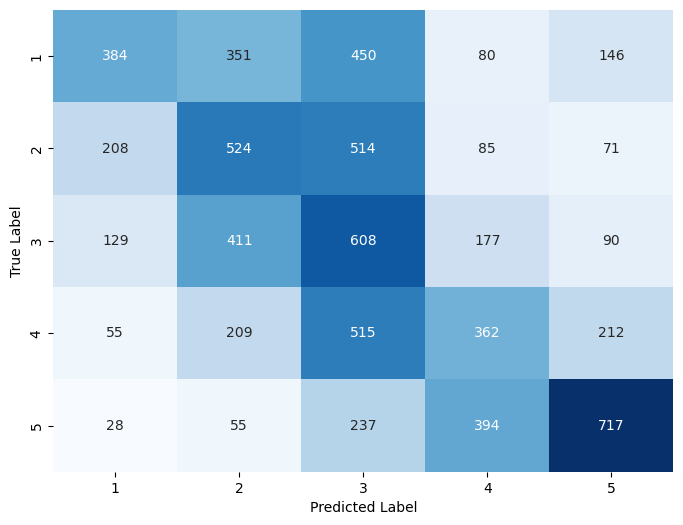

Found 19774 unique tokens.

Evaluating on Telegram dataset:
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3348 - loss: 1.5088
Test Accuracy: 0.3357, Test Loss: 1.4942
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


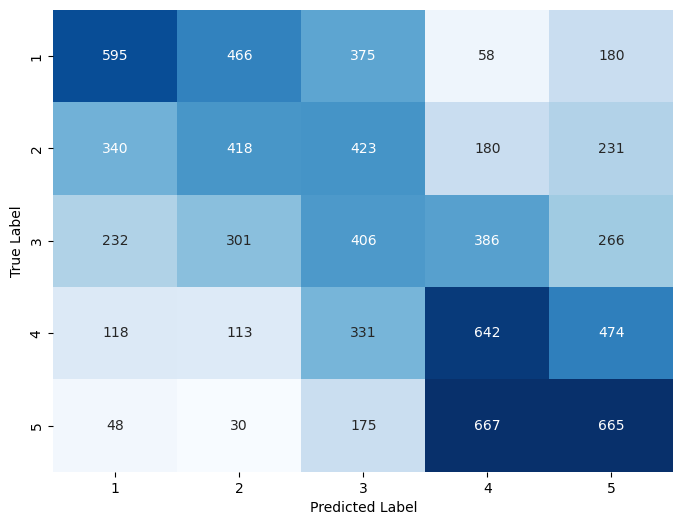


Model: HONGYI
Found 21326 unique tokens.

Evaluating on Paypal dataset:
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4308 - loss: 1.2700
Test Accuracy: 0.4316, Test Loss: 1.2680
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


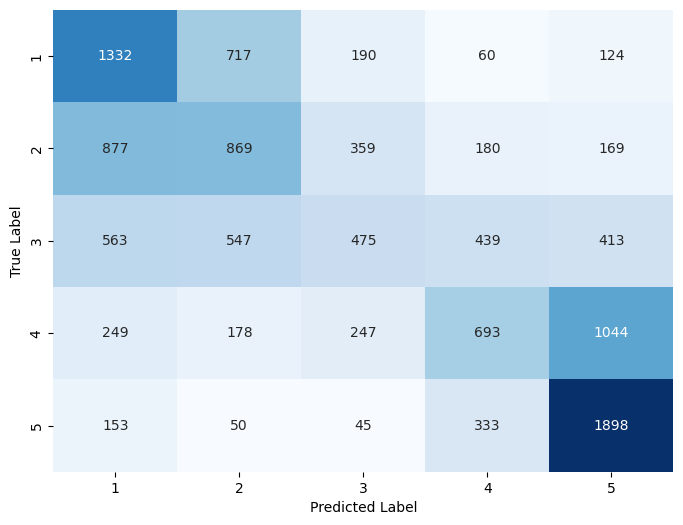

Found 21326 unique tokens.

Evaluating on Ebay dataset:
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4386 - loss: 1.2281
Test Accuracy: 0.4366, Test Loss: 1.2303
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


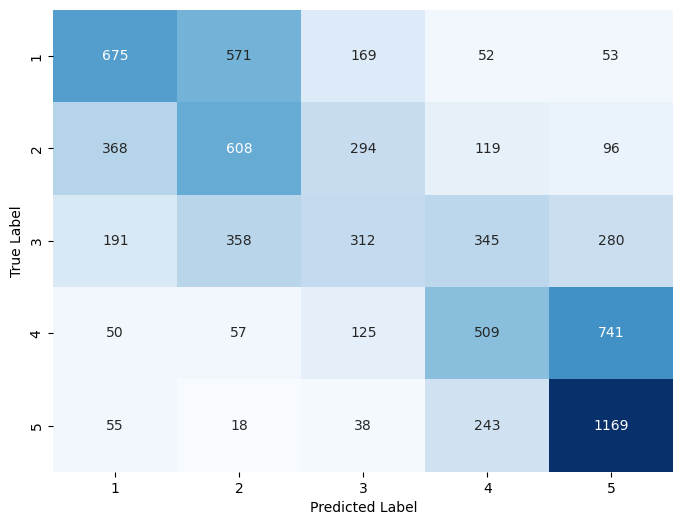

Found 21326 unique tokens.

Evaluating on Spotify dataset:
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4809 - loss: 1.2025
Test Accuracy: 0.4773, Test Loss: 1.1985
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


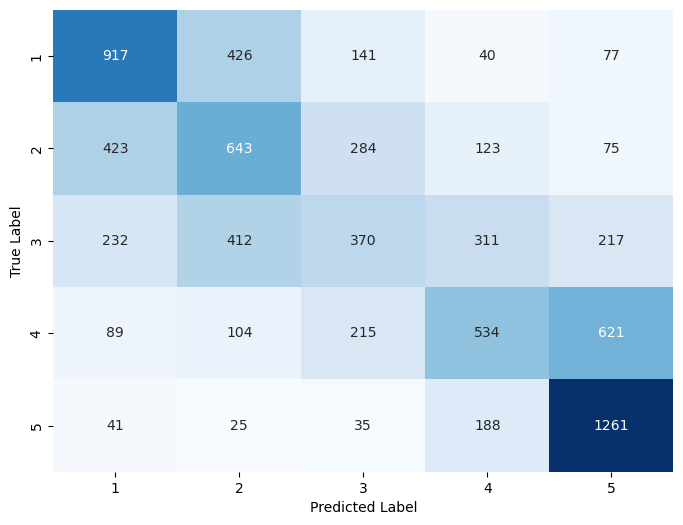

Found 21326 unique tokens.

Evaluating on Genshin dataset:
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4258 - loss: 1.3666
Test Accuracy: 0.4197, Test Loss: 1.3791
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


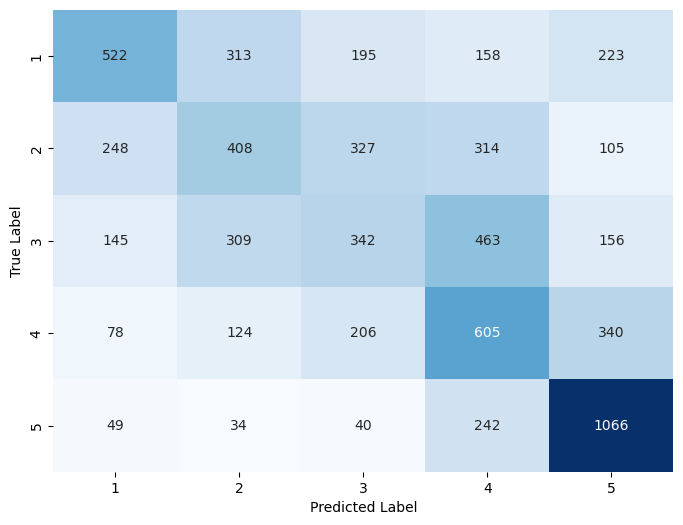

Found 21326 unique tokens.

Evaluating on Telegram dataset:
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3842 - loss: 1.4401
Test Accuracy: 0.3791, Test Loss: 1.4299
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


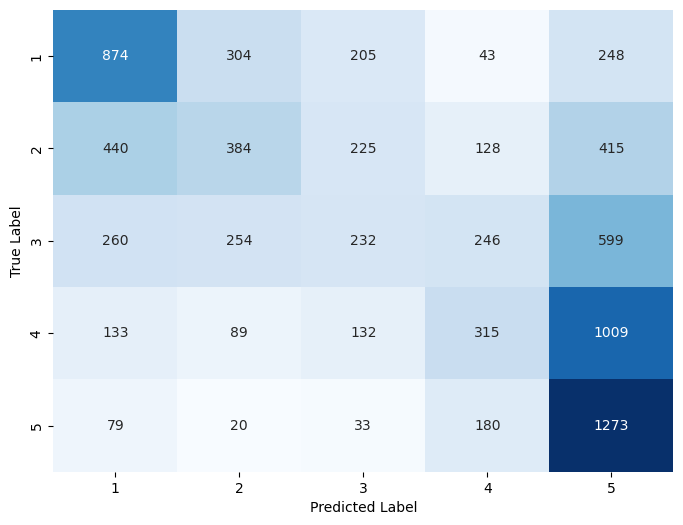


Model: REGEN
Found 25616 unique tokens.

Evaluating on Paypal dataset:
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3827 - loss: 1.3709
Test Accuracy: 0.3886, Test Loss: 1.3662
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


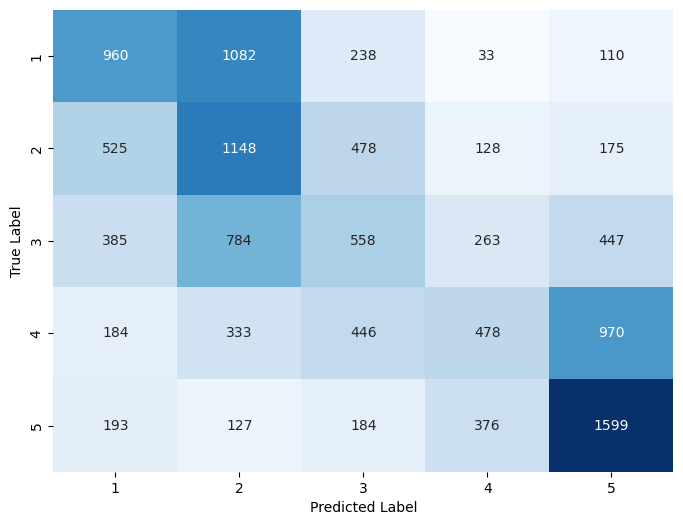

Found 25616 unique tokens.

Evaluating on Ebay dataset:
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4033 - loss: 1.3145
Test Accuracy: 0.4045, Test Loss: 1.3237
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


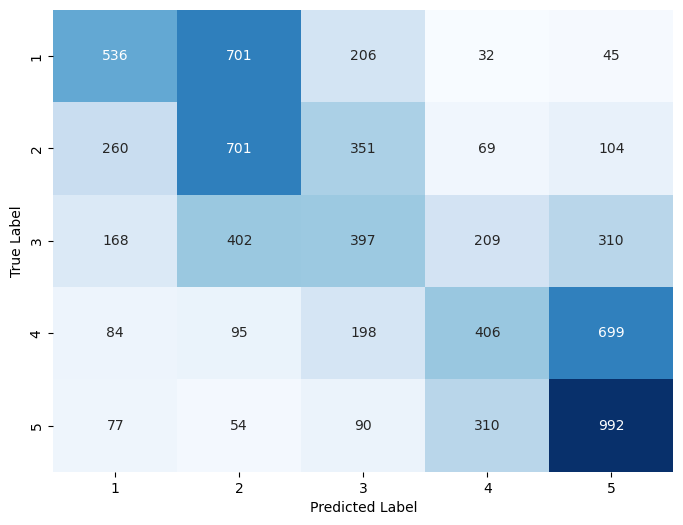

Found 25616 unique tokens.

Evaluating on Spotify dataset:
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4244 - loss: 1.3186
Test Accuracy: 0.4330, Test Loss: 1.3032
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


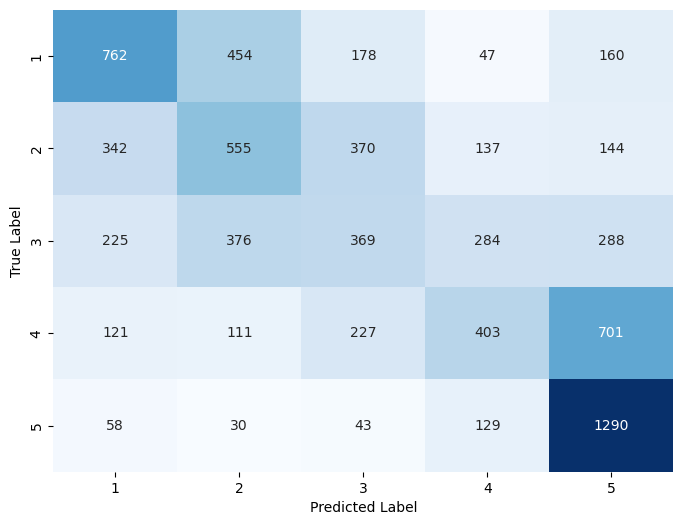

Found 25616 unique tokens.

Evaluating on Genshin dataset:
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4690 - loss: 1.2389
Test Accuracy: 0.4642, Test Loss: 1.2467
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


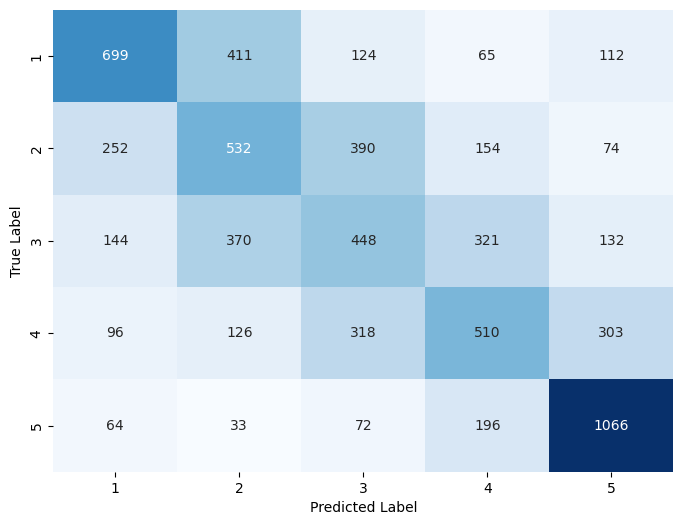

Found 25616 unique tokens.

Evaluating on Telegram dataset:
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3536 - loss: 1.5097
Test Accuracy: 0.3531, Test Loss: 1.4981
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


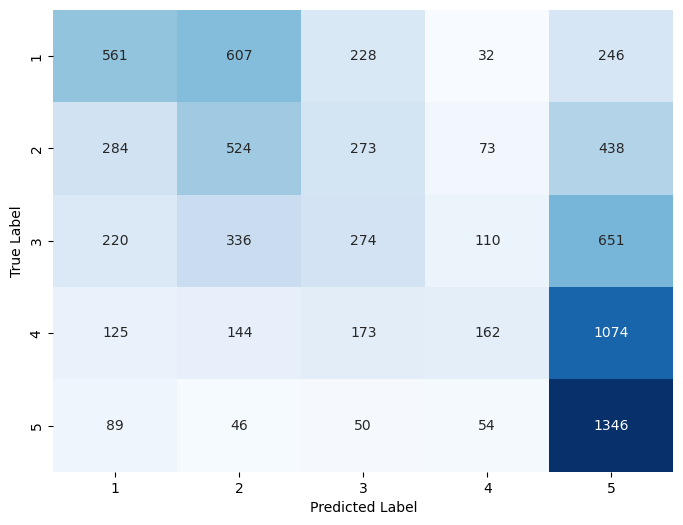


Model: ANSEL
Found 25717 unique tokens.

Evaluating on Paypal dataset:
382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4753 - loss: 1.1968
Test Accuracy: 0.4708, Test Loss: 1.2018
382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


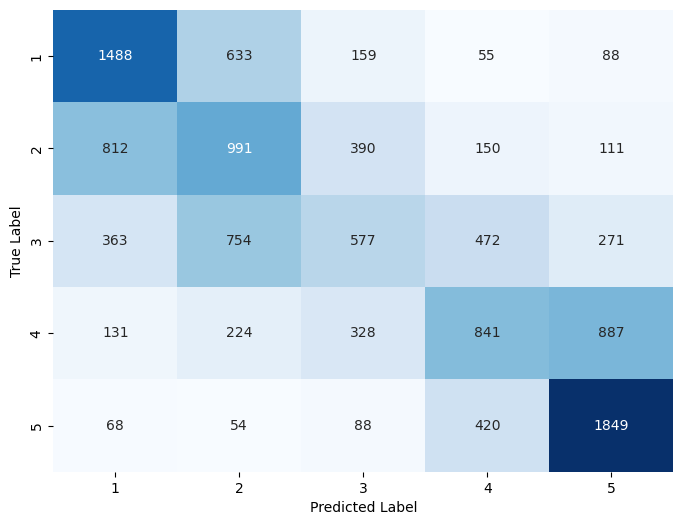

Found 25717 unique tokens.

Evaluating on Ebay dataset:
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4688 - loss: 1.2033
Test Accuracy: 0.4713, Test Loss: 1.2030
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


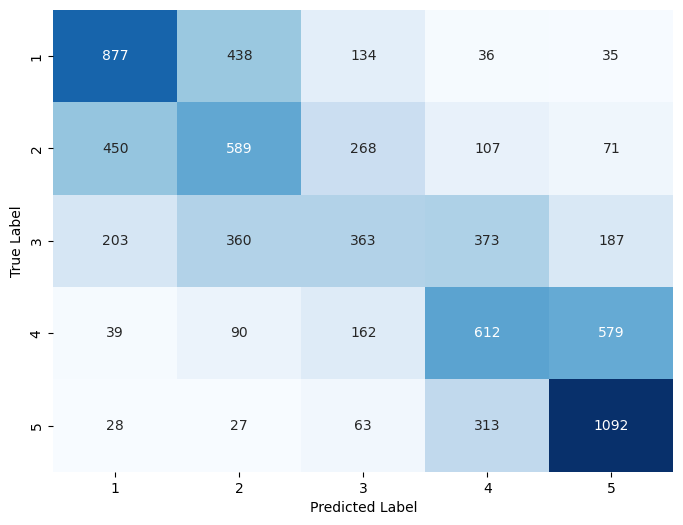

Found 25717 unique tokens.

Evaluating on Spotify dataset:
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4446 - loss: 1.3036
Test Accuracy: 0.4396, Test Loss: 1.2978
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


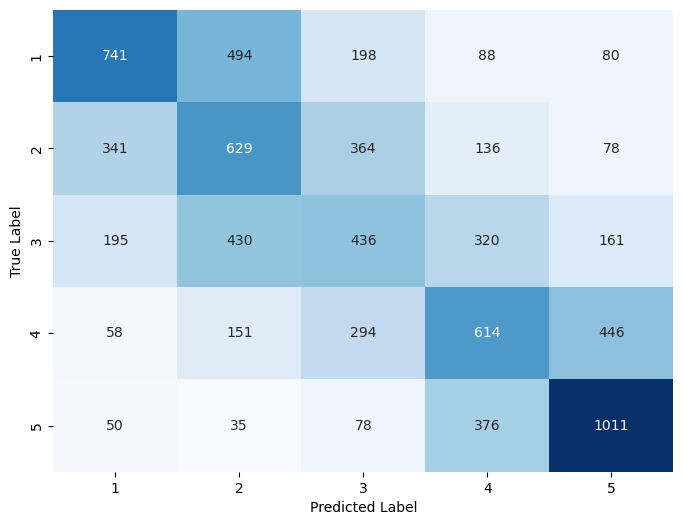

Found 25717 unique tokens.

Evaluating on Genshin dataset:
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4049 - loss: 1.4414
Test Accuracy: 0.3886, Test Loss: 1.4583
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


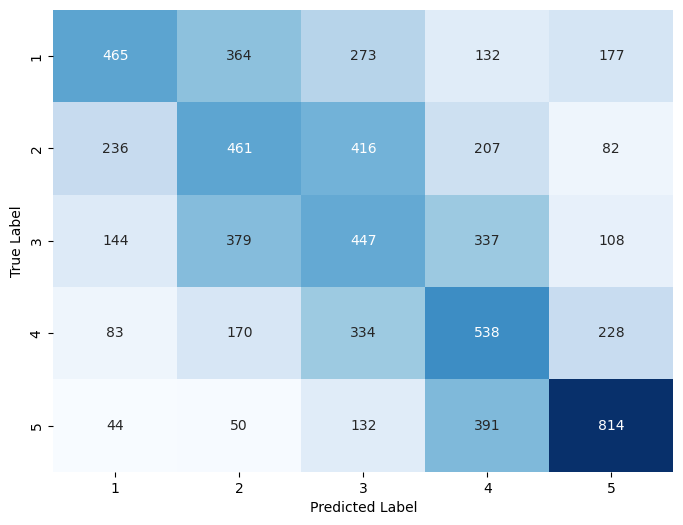

Found 25717 unique tokens.

Evaluating on Telegram dataset:
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3834 - loss: 1.4298
Test Accuracy: 0.3802, Test Loss: 1.4208
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


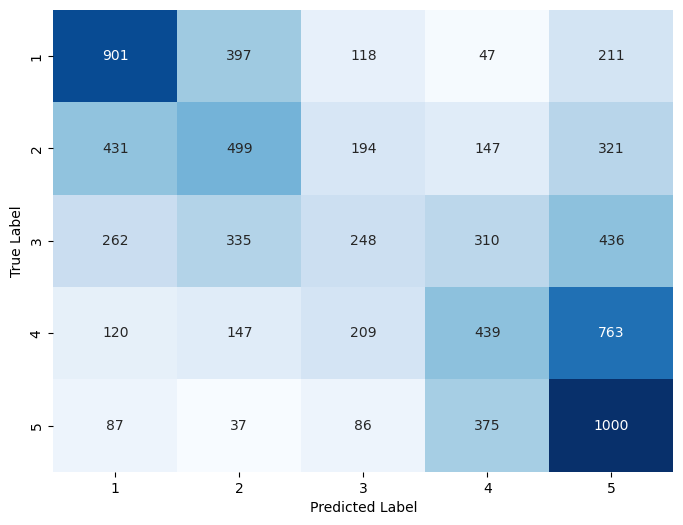


Model: GERMAINE
Found 18829 unique tokens.

Evaluating on Paypal dataset:
382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2835 - loss: 1.5922
Test Accuracy: 0.2862, Test Loss: 1.5863
382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


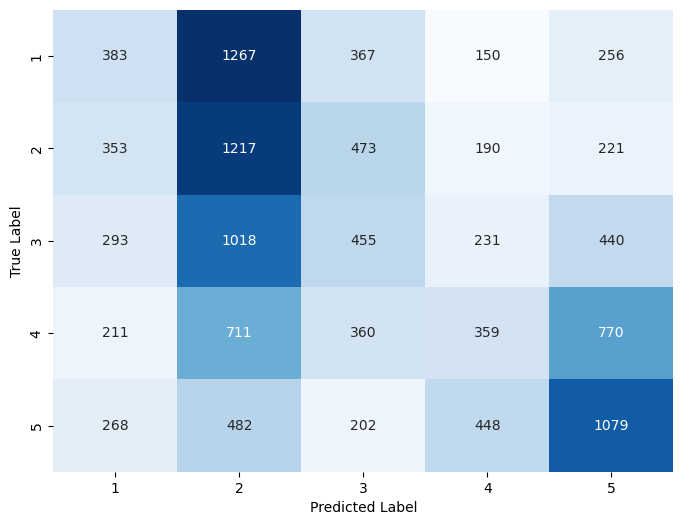

Found 18829 unique tokens.

Evaluating on Ebay dataset:
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2698 - loss: 1.5986
Test Accuracy: 0.2800, Test Loss: 1.5953
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


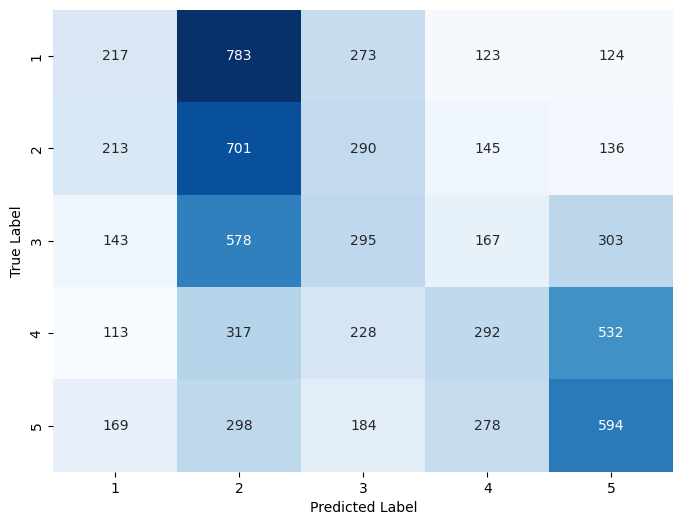

Found 18829 unique tokens.

Evaluating on Spotify dataset:
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2851 - loss: 1.5947
Test Accuracy: 0.2890, Test Loss: 1.6006
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


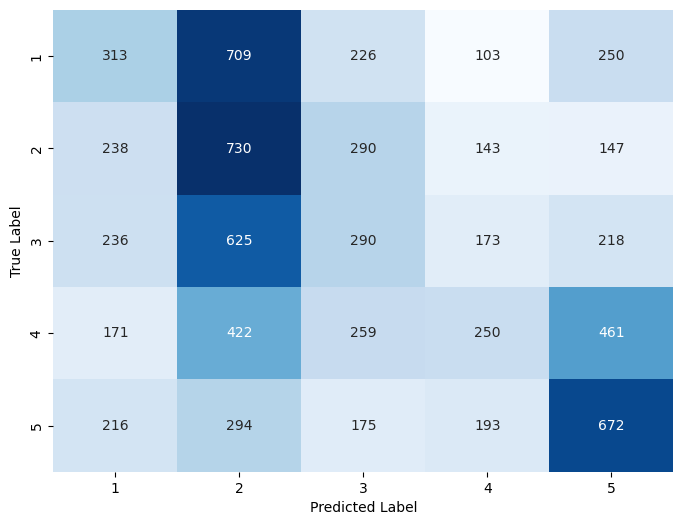

Found 18829 unique tokens.

Evaluating on Genshin dataset:
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2786 - loss: 1.6816
Test Accuracy: 0.2772, Test Loss: 1.6955
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


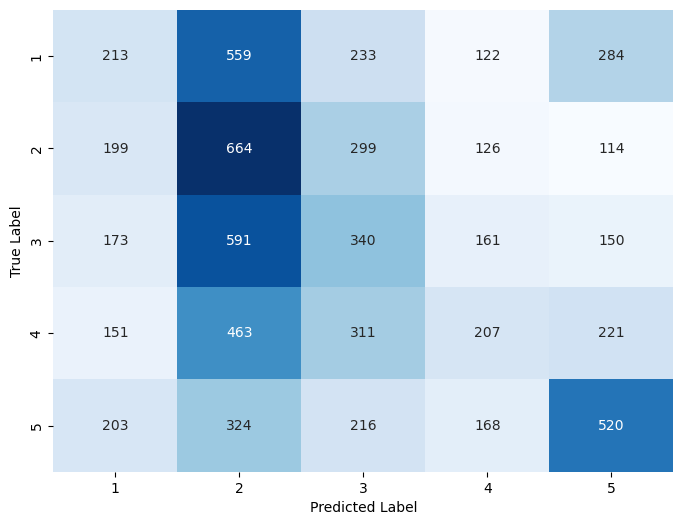

Found 18829 unique tokens.

Evaluating on Telegram dataset:
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3148 - loss: 1.5164
Test Accuracy: 0.3179, Test Loss: 1.5102
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


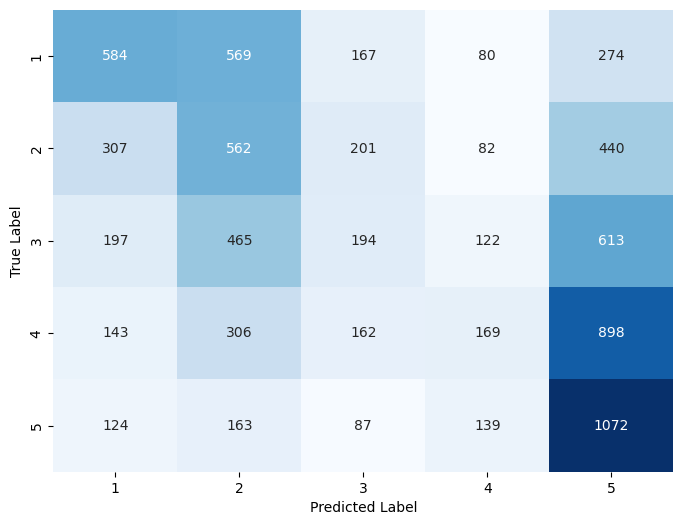

In [9]:
# For each model
for model_name, model in models.items():
    # Load the tokenizer corresponding to each model
    tokenizer = tokenizers[model_name]
    print(f"\nModel: {model_name.upper()}")
# For each dataset
    for df_name, df in dataframes.items():
        _, X_test, _, y_test = prepare_text_data(df, tokenizer)
        print(f"\nEvaluating on {df_name.title()} dataset:")
        evaluate_model(model)

In [10]:
# Save the Best Model
models['ansel'].save('text_model_best.keras')

## Step 4 – Use the Best Model to make prediction (Group)

In [11]:
best_model = keras.models.load_model('text_model_best.keras')

In [12]:
emoji_map = {
    0: "😠",  # Very Negative
    1: "☹️",  # Negative
    2: "😐",  # Neutral
    3: "🙂",  # Positive
    4: "😍"   # Very Positive
}

# Function to map predicted class to emoji
def map_to_emoji(pred_class):
    return emoji_map.get(pred_class)  


In [13]:
# convert the user input into numeric tensor
# Function to clean text
def preprocess_input(text_input, tokenizer):
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    cleaned = [clean_text(t) for t in text_input]
    sequences = tokenizer.texts_to_sequences(cleaned)
    padded = pad_sequences(sequences, maxlen=40)
    return padded

In [15]:
# show the model output using predict function
def predict(text_input, model, tokenizer):
    # Preprocess the input text (e.g., tokenize and pad it)
    prepped = preprocess_input(text_input, tokenizer)
    
    # Get model prediction — returns probabilities for each class
    prediction = model.predict(prepped)
    
    # Extract the prediction from the batch (shape: [1, 5] → [5])
    prediction = prediction[0]

    # Print the probability distribution with corresponding emojis
    print("Sentiment Probability Distribution:")
    for i, prob in enumerate(prediction):
        print(f"{emoji_map[i]}: {prob:.4f}")

    # Find the index of the highest probability (predicted class)
    pred_class = np.argmax(prediction)

    # Print the predicted sentiment using the emoji
    print(f"\nPredicted Sentiment: {emoji_map[pred_class]}")

##### google pay 1 star

In [16]:
# takes the user input
text_input = np.array([input()])
# preprocess and predict 
predict(text_input, best_model, tokenizers['ansel'])

 dk what kinda retard came up with the idea of removing self transfer from the homepage itself. I have no idea why does google keep messing with features that no one ever complained about. For this exact same reason I stopped using chrome altogether and now I guess will switch to other UPI apps.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Sentiment Probability Distribution:
😠: 0.4721
☹️: 0.3670
😐: 0.1383
🙂: 0.0212
😍: 0.0015

Predicted Sentiment: 😠


##### amazon 2 star

In [17]:
text_input = np.array([input()])
predict(text_input, best_model, tokenizers['ansel'])

 Not a fan of the recent update. Ads on top, then item picture, and description on bottom...very strange. What is going on while at checkout? The app has gotten slower especially with viewing the pictures...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Sentiment Probability Distribution:
😠: 0.0630
☹️: 0.3210
😐: 0.4101
🙂: 0.1987
😍: 0.0072

Predicted Sentiment: 😐


##### brawlstars 3 star

In [18]:
text_input = np.array([input()])
predict(text_input, best_model, tokenizers['ansel'])

 Although it was a really fun game at first, they just added like a new character every month, not giving you a chance to even get the previous one unless they are on the trophy road, or you are RNGesus himself. This means one of the only ways to consistently get characters is to grind, but even grinding is hard due to the sheer number of campers and teamers especially in showdown, which is one of the fastest ways to get trophies.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Sentiment Probability Distribution:
😠: 0.1029
☹️: 0.3077
😐: 0.3929
🙂: 0.1759
😍: 0.0206

Predicted Sentiment: 😐


##### sound cloud 4 star

In [19]:
text_input = np.array([input()])
predict(text_input, best_model, tokenizers['ansel'])

 Been using soundcloud for years, definitely my preferred music streaming app, though it does lack many quality of life features that other apps like spotify and YouTube music have. The 500 track limit for playlists is especially annoying. as a go+ member i really feel like i shouldn't have a limit when im paying for the premium experience. other than that, it's an excellent app.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Sentiment Probability Distribution:
😠: 0.0017
☹️: 0.0218
😐: 0.1838
🙂: 0.6867
😍: 0.1060

Predicted Sentiment: 🙂


##### whatsapp 5 star

In [20]:
text_input = np.array([input()])
predict(text_input, best_model, tokenizers['ansel'])

 WhatsApp is hands down one of the most convenient and user-friendly messaging apps out there! With end-to-end encryption, group chats, file sharing, and voice/video calls, it's got everything I need to stay connected with friends and family. The interface is super intuitive, and it's available on almost every platform. Love it! 😊


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sentiment Probability Distribution:
😠: 0.0153
☹️: 0.0519
😐: 0.1384
🙂: 0.4398
😍: 0.3546

Predicted Sentiment: 🙂
